<a href="https://colab.research.google.com/github/JMJ-01/JMJ-01.github.io-scientific-programs/blob/main/take_home_exam_2_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

learning to plot in matplot

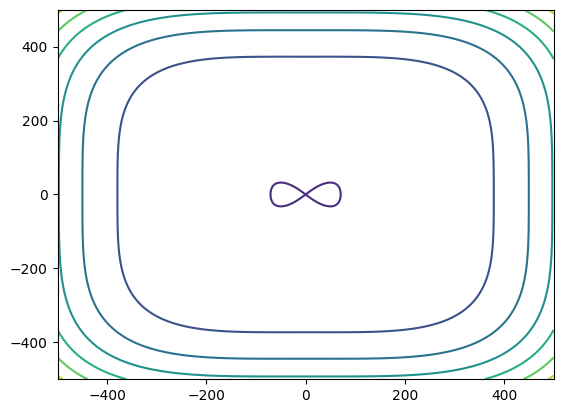

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

B=0.001
C=5
A=5

f= lambda x,y : B*(x**4+Y**4)-C*(x**2)+A*(y**2)
x= np.linspace(-500,500,1000)
y= np.linspace(-500,500,1000)
X, Y= np.meshgrid(x,y)

P= f(X,Y)


plt.contour(X,Y,P)
plt.show()


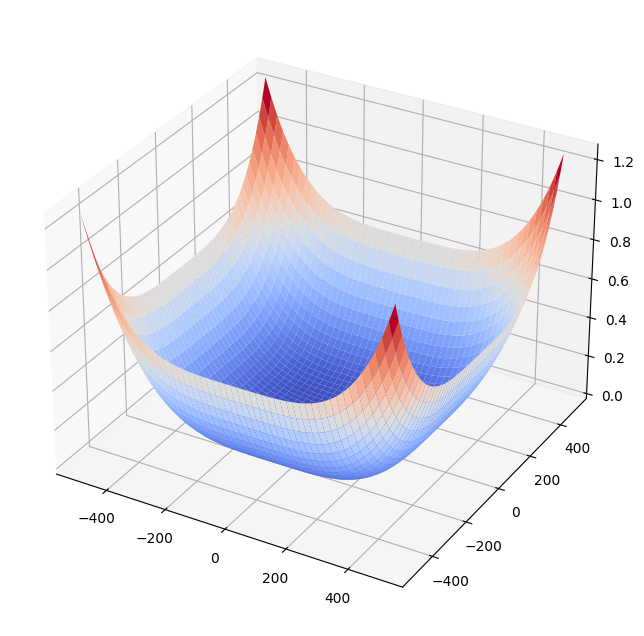

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

B = 0.01
C = 5
A = 5

f = lambda x, y: (B * (x**4+Y**4) - C * (x**2) + A * (y**2))
x = np.linspace(-500, 500, 1000)
y = np.linspace(-500, 500, 1000)
X, Y = np.meshgrid(x, y)

P = f(X, Y)

fig = plt.figure(figsize=[12, 8])
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, P, cmap=cm.coolwarm)
plt.show()  # Explicitly show the plot


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

B = 0.01
C = 5
A = 5

f = lambda x, y: (B * (x**4) - C * (x**2) + A * (y**2))
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)

P = f(X, Y)

def plotter(E,A):
  fig = plt.figure(figsize=[12, 8])
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X, Y, P, cmap=cm.coolwarm)
  ax.view_init(elev=E, azim=A)
  plt.show()  # Explicitly show the plot

#plotter(30,45)

from ipywidgets import interactive
iplot = interactive(plotter,
                    E= (-90,90,5),
                    A= (-90, 90,5)
                    )
iplot

interactive(children=(IntSlider(value=0, description='E', max=90, min=-90, step=5), IntSlider(value=0, descrip…

manually coding newtons method

^^^^^^^^^^^^^^^^^correct^^^^^^^^^^^^^

In [ ]:
import numpy as np
from scipy.optimize import minimize
from ipywidgets import interactive
import matplotlib.pyplot as plt
from matplotlib import cm

# Constants
B = 0.01
C = 5
A = 5

# Define your numerical function
def numerical_function(x):
    # Replace this with your function
    return B * (x**4) - C * (x**2) + A * (y**2)


# Define the gradient of the function
def gradient(vars):
    x, y = vars
    first_partial_x = (4 * B * x**3) + (-2 * C * x)
    first_partial_y = 2 * A * y
    gradient_vector = np.array([first_partial_x, first_partial_y])
    return gradient_vector

# Define the Hessian of the function
def hessian(vars):
    x, y = vars
    second_partial_x_x = 12 * B * x**2 - 2 * C
    second_partial_x_y = 0
    second_partial_y_x = 0
    second_partial_y_y = 2 * A
    hessian_matrix = np.array([[second_partial_x_x, second_partial_x_y],
                               [second_partial_x_y, second_partial_y_y]])
    return hessian_matrix

# Newton's Method for Minimizing Gradient Function
def newtons_method(initial_guess, tolerance=1e-6, max_iterations=100):
    vars = np.array(initial_guess)
    for i in range(max_iterations):
        grad = gradient(vars)
        hess = hessian(vars)
        delta = np.linalg.solve(hess, grad)
        vars = vars - delta
        if np.linalg.norm(delta) < tolerance:
            break
    return vars

# Initial guess
initial_guess = [3.0, 3.0]

# Perform Newton's Method
result = newtons_method(initial_guess)

# Extract the optimized parameters
optimized_x, optimized_y = result

print("Optimized x (saddle point):", optimized_x)
print("Optimized y (saddle point):", optimized_y)

# Check if it's a saddle point (has both positive and negative eigenvalues)
eigenvalues = np.linalg.eigvals(hessian([optimized_x, optimized_y]))
if any(eig > 0 for eig in eigenvalues) and any(eig < 0 for eig in eigenvalues):
    print("Saddle Point found.")
else:
    print("No saddle point found.")

##############################################################################
# PLOTTING SADDLE POINT AND GRAPH
##############################################################################


f = lambda x, y: B * (x**4) - C * (x**2) + A * (y**2)
x = np.linspace(-25, 25, 1000)
y = np.linspace(-25, 25, 1000)
X, Y = np.meshgrid(x, y)
saddle_value = f(optimized_x, optimized_y)
P = f(X, Y)

def plotter(E, A):
    fig = plt.figure(figsize=[12, 8])
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, P, cmap=cm.coolwarm)
    ax.scatter(optimized_x, optimized_y , saddle_value+1000, color='red', s=100, label=f'Saddle Point\nValue: {saddle_value:.2f}')
    ax.view_init(elev=E, azim=A)
    plt.legend()
    plt.show()

from ipywidgets import interactive

iplot = interactive(plotter, E=(-90, 90, 5), A=(-90, 90, 5))
iplot

Optimized x (saddle point): 0.0
Optimized y (saddle point): 0.0
Saddle Point found.


interactive(children=(IntSlider(value=0, description='E', max=90, min=-90, step=5), IntSlider(value=0, descrip…

^^^^^^^^^^^^^^correct^^^^^^^^^^^^^^^^^

working code ploting last 10 points

Something is wrong in this code although it plots the 10 points

In [ ]:
import numpy as np
from scipy.optimize import minimize
from ipywidgets import interactive
import matplotlib.pyplot as plt
from matplotlib import cm

# Constants
B = 0.01
C = 5
A = 5

# Define your numerical function
def numerical_function(x):
    # Replace this with your function
    return B * (x[0]**4) - C * (x[0]**2) + A * (x[1]**2)

# Define the gradient of the function
def gradient(vars):
    x, y = vars
    first_partial_x = (4 * B * x**3) + (-2 * C * x)
    first_partial_y = 2 * A * y
    gradient_vector = np.array([first_partial_x, first_partial_y])
    return gradient_vector

# Define the Hessian of the function
def hessian(vars):
    x, y = vars
    second_partial_x_x = 12 * B * x**2 - 2 * C
    second_partial_x_y = 0
    second_partial_y_x = 0
    second_partial_y_y = 2 * A
    hessian_matrix = np.array([[second_partial_x_x, second_partial_x_y],
                               [second_partial_x_y, second_partial_y_y]])
    return hessian_matrix

# Newton's Method for Minimizing Gradient Function
def newtons_method(initial_guess, tolerance=1e-6, max_iterations=100):
    vars = np.array(initial_guess)
    intermediate_points = []  # Store intermediate points

    for i in range(max_iterations):
        intermediate_points.append(vars.copy())  # Store current point
        grad = gradient(vars)
        hess = hessian(vars)
        delta = np.linalg.solve(hess, grad)
        vars = vars - delta
        if np.linalg.norm(delta) < tolerance:
            break

    # Evaluate the function at intermediate points
    function_values = [numerical_function(point) for point in intermediate_points[-10:]]

    # Return optimized variables, last ten intermediate points, and their function values
    return vars, list(zip(intermediate_points[-10:], function_values))

# Initial guess
initial_guess = [3.0, 3.0]

# Perform Newton's Method
result, last_ten_points_with_values = newtons_method(initial_guess)

# Extract the optimized parameters
optimized_x, optimized_y = result

print("Optimized x (saddle point):", optimized_x)
print("Optimized y (saddle point):", optimized_y)

# Check if it's a saddle point (has both positive and negative eigenvalues)
eigenvalues = np.linalg.eigvals(hessian([optimized_x, optimized_y]))
if any(eig > 0 for eig in eigenvalues) and any(eig < 0 for eig in eigenvalues):
    print("Saddle Point found.")
else:
    print("No saddle point found.")

# Print the last ten intermediate points with function values
print("Last ten intermediate points with function values:")
for point, value in last_ten_points_with_values:
    print(f"Point: {point}, Function Value: {value}")

##############################################################################
# PLOTTING SADDLE POINT AND GRAPH
##############################################################################

f = lambda x, y: B * (x**4) - C * (x**2) + A * (y**2)
x = np.linspace(-20, 20, 1000)
y = np.linspace(-20, 20, 1000)
X, Y = np.meshgrid(x, y)
saddle_value = f(optimized_x, optimized_y)
P = f(X, Y)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

def plotter(E, A):
    fig = plt.figure(figsize=[12, 8])
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, P, cmap=cm.coolwarm)
    ax.scatter(optimized_x, optimized_y, saddle_value, color='red', s=100, label=f'Saddle Point\nValue: {saddle_value:.2f}')

    # Convert last_ten_points and function_values to NumPy arrays
    last_ten_points_array = np.array([point for point, _ in last_ten_points_with_values])
    function_values_array = np.array([value for _, value in last_ten_points_with_values])

    # Plot the last ten intermediate points with their function values
    ax.scatter(last_ten_points_array[:, 0], last_ten_points_array[:, 1], function_values_array+1.5, color='green', s=100, label='Intermediate Points')

    # Plot arrows connecting intermediate points
    for i in range(len(last_ten_points_array) - 1):
        arrow_start = last_ten_points_array[i]
        arrow_end = last_ten_points_array[i + 1]
        ax.quiver(arrow_start[0], arrow_start[1], function_values_array[i],
                  arrow_end[0] - arrow_start[0], arrow_end[1] - arrow_start[1], function_values_array[i + 1] - function_values_array[i],
                  color='blue', arrow_length_ratio=1)

    ax.view_init(elev=E, azim=A)
    plt.legend()
    plt.show()

iplot = interactive(plotter, E=(-90, 90, 5), A=(-90, 90, 5))
iplot




Optimized x (saddle point): 0.0
Optimized y (saddle point): 0.0
Saddle Point found.
Last ten intermediate points with function values:
Point: [3. 3.], Function Value: 0.8100000000000023
Point: [-0.24215247  0.        ], Function Value: -0.29315470090404483
Point: [0.00011367 0.        ], Function Value: -6.460925897748443e-08
Point: [-1.1751071e-14  0.0000000e+00], Function Value: -6.904383525097177e-28


interactive(children=(IntSlider(value=0, description='E', max=90, min=-90, step=5), IntSlider(value=0, descrip…

trial for Q3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

B = 0.01
C = 5
A = 5

f = lambda x, y: (B * (x**4) - C * (x**2) + A * (y**2))
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)

P = f(X, Y)

def plotter(E,A):
  fig = plt.figure(figsize=[12, 8])
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X, Y, P, cmap=cm.coolwarm)
  ax.view_init(elev=E, azim=A)
  plt.show()  # Explicitly show the plot


from ipywidgets import interactive
iplot = interactive(plotter,
                    E= (-90,90,5),
                    A= (-90, 90,5)
                    )
iplot

def velocity_verlet_x_y():
    x_0 = 1
    y_0 = 1
    v_x_0 = 2
    v_y_0 = 2
    a_x_0 = 0
    a_y_0 = 0
    p_x_0 = 0
    p_y_0 = 0
    f_xy_0 = 0 # change it to take function value

    x = x_0
    y = y_0
    v_x = v_x_0
    v_y = v_y_0
    a_x = a_x_0
    a_y = a_y_0

    B = 0.001
    C = 1
    A = 1

    # Initialization of arrays for position, velocity, acceleration
    x_t = np.array([x_0])
    y_t = np.array([y_0])
    vx_t = np.array([v_x_0])
    vy_t = np.array([v_y_0])
    ax_t = np.array([a_x_0])
    ay_t = np.array([a_y_0])
    px_t = np.array([p_x_0])
    py_t = np.array([p_y_0])
    fxy_t = np.array([f_xy_0])

    del_t = np.linspace(0, 1.5, 100)

    for t in del_t:
        x = x_t[-1] + vx_t[-1] * t + 0.5 * ax_t[-1] * t**2
        y = y_t[-1] + vy_t[-1] * t + 0.5 * ay_t[-1] * t**2

        x_t = np.append(x_t, x)  # Append the new position to the array
        y_t = np.append(y_t, y)  # Append the new position to the array
        fxy_t = np.append(fxy_t, B * (x**4) - C * (x**2) + A * (y**2)) # Function value

        a_x = 4*B*x**3-2*C*x  # Calculate new acceleration    <------- CHANGE IT
        a_y = 2*A*y  # Calculate new acceleration    <------- CHANGE IT

        v_x = vx_t[-1] + 0.5 * t * (ax_t[-1] + a_x)  # Calculate new velocity
        v_y = vy_t[-1] + 0.5 * t * (ay_t[-1] + a_y)  # Calculate new velocity

        vx_t = np.append(vx_t, v_x)  # Append the new velocity to the array
        vy_t = np.append(vy_t, v_y)  # Append the new velocity to the array

        ax_t = np.append(ax_t, a_x)  # Append the new acceleration to the array
        ay_t = np.append(ay_t, a_y)  # Append the new acceleration to the array

    return x_t, y_t, vx_t, vy_t, ax_t, ay_t, fxy_t

def main():
    global pos_x
    global pos_x
    global pos_y
    global vel_x
    global vel_y
    global acc_x
    global acc_y
    global func_val
    pos_x, pos_y, vel_x, vel_y, acc_x, acc_y, func_val = velocity_verlet_x_y()

if __name__ == "__main__":
    main()